# Playground

This is your playground to test the Q-learning agent. You can modify anything you want in this file. It will not be graded.

## Setup

In [12]:
# Setup
import random
import numpy as np
import matplotlib.pyplot as plt
from q_learning import QLearningAgent
from utils import generate_random_mdp

# What is autoreload? See: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Training

In [13]:
# You may set seed here for reproducibility
SEED = 0
N_ROUNDS = 10000   

random.seed(SEED)
np.random.seed(SEED)

env = generate_random_mdp(n_states=3, n_actions=2, sparse_reward=False)

# Feel free to play around with different hyperparameters. 
# (E.g., try buffer_capacity=1, which is equivalent to Q-learning without experience replay)
agent = QLearningAgent(
    state_space=env.state_space,
    action_space=env.action_space,
    lr=0.1,
    discount=0.99,
    explore_rate=0.5,
    buffer_capacity=1000,
    batch_size=32,
)

reports = []
state, info = env.reset()
for t in range(N_ROUNDS):
    action = agent.act(state)
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    agent.observe(state, action, reward, next_state)
    report = agent.learn()
    report.update({'round': t, 'reward': reward})
    reports.append(report)
    if done:
        state, info = env.reset()
    else:
        state = next_state

reports[-1]

{'td_error': array([ 0.01749853,  0.01749853,  0.01749853,  0.01749853,  0.08996644,
         0.01749853,  0.01749853,  0.01749853,  0.01749853,  0.01835751,
         0.01749853, -0.09743558, -0.00255627,  0.08136827, -0.16044634,
         0.01749853,  0.01749853,  0.01749853, -0.09038299,  0.01835751,
         0.01749853,  0.01749853,  0.01749853, -0.09038299,  0.01749853,
        -0.16044634,  0.19870694,  0.01749853,  0.01077492,  0.08996644,
         0.01749853,  0.01749853]),
 'q_table': array([[95.95143138, 95.93943331],
        [96.04851037, 95.95064392],
        [95.87589929, 96.11373149]]),
 'value_arr': array([95.95143138, 96.04851037, 96.11373149]),
 'policy_arr': array([0, 0, 1]),
 'round': 9999,
 'reward': np.float64(0.978618342232764)}

## Plots

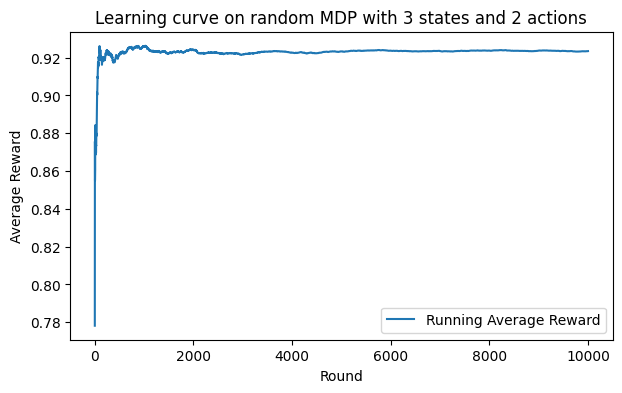

In [14]:
rewards = np.array([report['reward'] for report in reports])
rounds = np.arange(1, N_ROUNDS + 1)
running_avg = rewards.cumsum() / rounds
plt.figure(figsize=(7, 4))
plt.plot(rounds, running_avg, label='Running Average Reward')
plt.xlabel('Round')
plt.ylabel('Average Reward')
plt.title(f'Learning curve on random MDP with {env.state_space.n} states and {env.action_space.n} actions')
plt.legend()
plt.show()

# Notes
- We may expect the RL agent to obtain higher running-average reward as it interacts with the environment.
- Indeed, for a small randomly generated MDP (e.g., 3 states, 2 actions), with appropriate hyper-parameters, the running-average reward should converge after 1,000 rounds. See below for an example:

![example_learning_curve.png](./example_learning_curve.png)

- However, it is possible to see occasional drops in performance. Vanilla Q-Learning is not guaranteed to converge in general. 
- For non-trivial environments, an online RL agent may also suffer from [*catatraphic forgetting*](https://en.wikipedia.org/wiki/Catastrophic_interference).